In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")

In [3]:
df['sudden weight loss'].value_counts()

No     303
Yes    217
Name: sudden weight loss, dtype: int64

In [4]:
df.shape

(520, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Features

In [8]:
df_plot = df.drop(columns='Age')

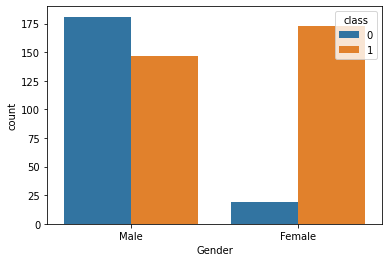

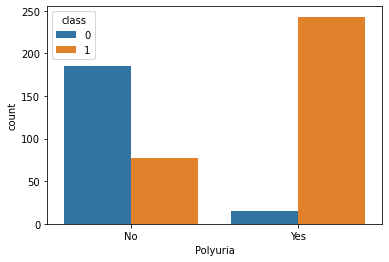

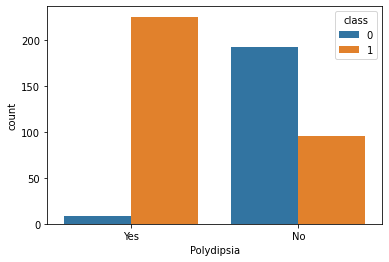

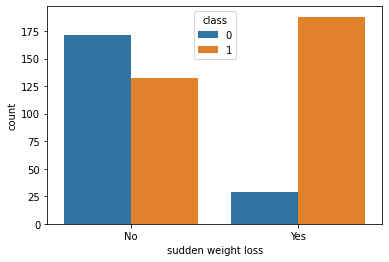

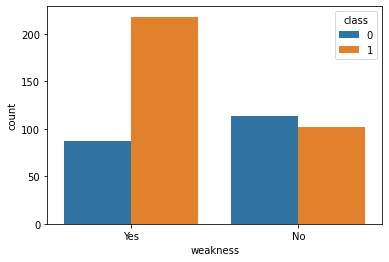

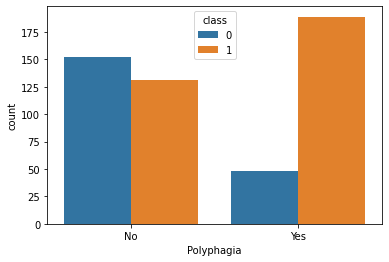

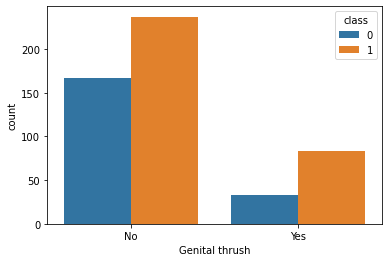

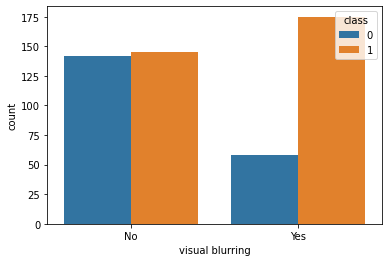

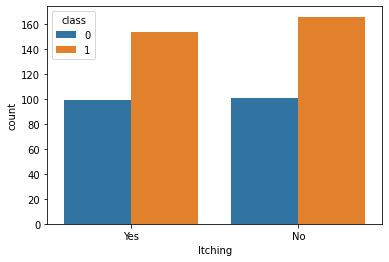

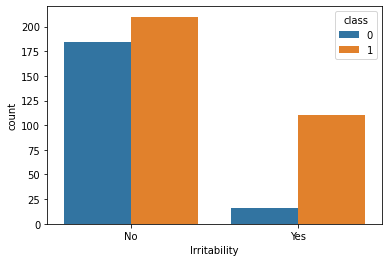

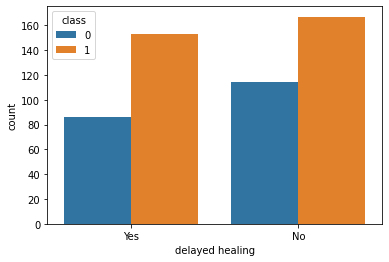

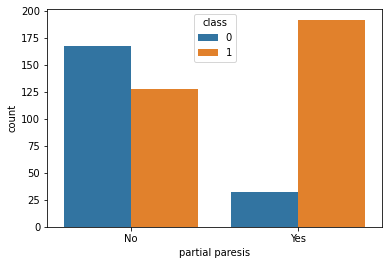

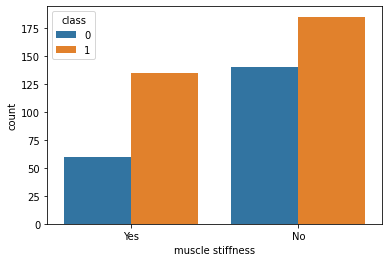

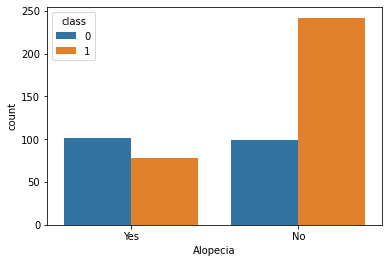

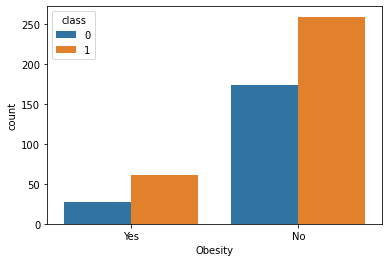

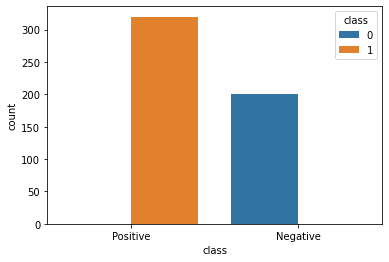

In [33]:
for i, col in enumerate(df_plot.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df_plot, hue=df['class'])

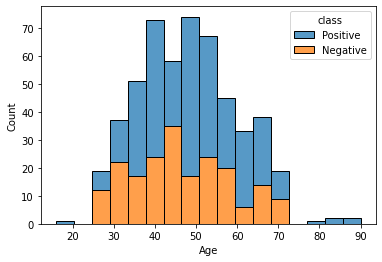

In [10]:
sns.histplot(x=df['Age'], multiple="stack", hue=df['class']);

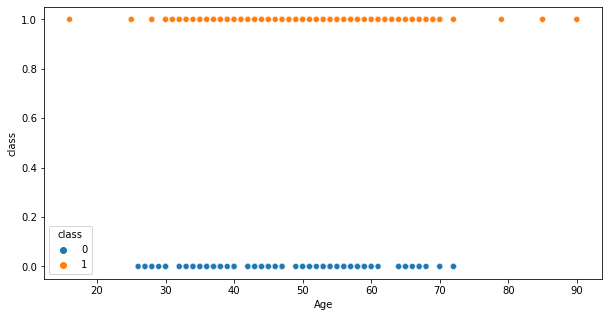

In [37]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y=df['class'], x=df['Age'], hue=df['class']);

* itching, delayed healing, muscle stiffness have same diabetic class proportion in their respective categories. Together with "age", they look like don't provide distinction for diabetic class positive or negative 

### Encoding

In [12]:
df = df.replace('Yes', 1)
df = df.replace('No', 0)

In [13]:
df['Gender'] = np.where(df['Gender'] == 'Male',1,0)
df['class'] = np.where(df['class'] == 'Positive',1,0)

In [14]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Train-test split

In [15]:
pred = df.drop(columns='class')
target = df['class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pred, target, test_size=0.2, random_state=42)

### Chi-Square

In [41]:
from sklearn.feature_selection import chi2
chi2 = chi2(X_train.drop(columns='Age'), y_train)
chi2

(array([2.86218846e+01, 9.83482830e+01, 1.00841006e+02, 5.27067383e+01,
        9.49869897e+00, 2.05537369e+01, 6.08110114e+00, 1.36405951e+01,
        7.26886835e-02, 2.92191349e+01, 3.60275433e-01, 4.18921332e+01,
        2.66480178e+00, 1.84812468e+01, 1.27415851e+00]),
 array([8.79821908e-08, 3.50904930e-23, 9.96713587e-24, 3.87260184e-13,
        2.05617643e-03, 5.79804945e-06, 1.36635577e-02, 2.21347266e-04,
        7.87461546e-01, 6.46377036e-08, 5.48353307e-01, 9.64499018e-11,
        1.02590605e-01, 1.71584358e-05, 2.58987993e-01]))

In [42]:
chi2_score = pd.DataFrame(chi2[0])
chi2_score.index = X_train.drop(columns='Age').columns

In [45]:
chi2_score.columns = ['chi2_score']
chi2_score

,chi2_score
Gender,28.62188455
Polyuria,98.34828304
Polydipsia,100.84100615
sudden weight loss,52.70673835
weakness,9.49869897
Polyphagia,20.55373693
Genital thrush,6.08110114
visual blurring,13.64059511
Itching,0.07268868
Irritability,29.21913488


In [46]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)
p_val = pd.DataFrame(chi2[1])
p_val.index = X_train.drop(columns='Age').columns
p_val.columns = ['p_values']
p_val

,p_values
Gender,0.00000009
Polyuria,0.00000000
Polydipsia,0.00000000
sudden weight loss,0.00000000
weakness,0.00205618
Polyphagia,0.00000580
Genital thrush,0.01366356
visual blurring,0.00022135
Itching,0.78746155
Irritability,0.00000006


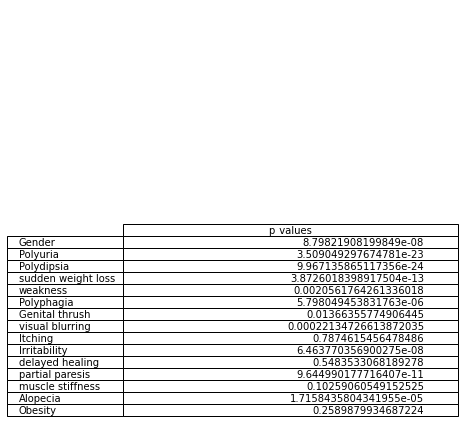

In [21]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, p_val)  # where df is your data frame

plt.savefig('p_value.png')

* Itching, delayed healing, muscle stiffness, dan Obesity chi-square score mendekati 0 menunjukkan besar kemungkinan variabel-variabel tersebut independen terhadap target (tidak ada hubungan). Otomatis p-value tinggi, meskipun di sample data menunjukkan adanya hubungan, kemungkinan besar hubungan tersebut hanya fluke

### Cross Validation (Ten-fold)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
models = [KNeighborsClassifier(n_neighbors=5), LogisticRegression(solver='lbfgs', max_iter=500), RandomForestClassifier()]
names = ["KNN", "Logistic Regression", "Random Forest"]
for model, name in zip(models, names):
    print (name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print (score), print (":"),
        print (cross_val_score(model, X_train, y_train,scoring=score, cv=10).mean()), print("      ")

KNN
accuracy
:
0.8559814169570268
      
precision
:
0.9559723609723608
      
recall
:
0.7991666666666667
      
f1
:
0.8659714349999762
      
Logistic Regression
accuracy
:
0.9181765389082462
      
precision
:
0.9510244755244756
      
recall
:
0.9118333333333334
      
f1
:
0.9302938324265877
      
Random Forest
accuracy
:
0.9783391405342625
      
precision
:
0.9807336182336183
      
recall
:
0.9800000000000001
      
f1
:
0.977874349739896
      


* Random forest model terbaik dalam semua metric terutama recall

### Evaluation

In [25]:
# take random forest, high recall, first without feature elimination

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def evaluate(model, x_test, y_test = y_test):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    

In [26]:
random_forest_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
random_forest_model.fit(X_train, y_train)
print(evaluate(random_forest_model, X_test))

Accuracy: 0.9903846153846154
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

------
Assuming 1 as positive, we get:

True Positive: 70
True Negative: 33
False Positive: 0
False Negative: 1

Precision: 1.0
Recall: 0.9859154929577465
F1-Score: 0.9929078014184397
None


In [27]:
X_train1 = X_train.drop(columns=['Itching', 'delayed healing', 'muscle stiffness', 'Obesity', 'Age'])
X_test1 = X_test.drop(columns=['Itching', 'delayed healing', 'muscle stiffness', 'Obesity', 'Age'])

In [28]:
rf_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
rf_model.fit(X_train1, y_train)
evaluate(rf_model, X_test1)

Accuracy: 0.9711538461538461
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.99      0.97      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

------
Assuming 1 as positive, we get:

True Positive: 69
True Negative: 32
False Positive: 1
False Negative: 2

Precision: 0.9857142857142858
Recall: 0.971830985915493
F1-Score: 0.9787234042553192


* Model random forest untuk tipe data seperti ini memiliki hasil yang lebih baik tanpa adanya seleksi fitur dibanding dengan seleksi fitur